In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("sepsis.csv")  
df.head()


,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [3]:
df.shape             # Number of rows and columns
df.info()            # Data types and non-null values
df.describe()        # Statistical summary
df.isnull().sum()    # Check for missing values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

Unnamed: 0                0
Hour                      0
HR                   153399
O2Sat                202736
Temp                1026984
SBP                  226265
MAP                  193270
DBP                  486554
Resp                 238335
EtCO2               1494574
BaseExcess          1468065
HCO3                1487182
FiO2                1422845
pH                  1444637
PaCO2               1465909
SaO2                1498649
AST                 1527027
BUN                 1445642
Alkalinephos        1527269
Calcium             1460879
Chloride            1481744
Creatinine          1457594
Bilirubin_direct    1549220
Glucose             1286694
Lactate             1510764
Magnesium           1454259
Phosphate           1489909
Potassium           1407685
Bilirubin_total     1529069
TroponinI           1537429
Hct                 1414777
Hgb                 1437619
PTT                 1506511
WBC                 1452763
Fibrinogen          1541968
Platelets           

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [6]:
missing_percent = df.isnull().mean() * 100
missing_percent.sort_values(ascending=False)


Bilirubin_direct    99.807371
Fibrinogen          99.340167
TroponinI           99.047745
Bilirubin_total     98.509158
Alkalinephos        98.393194
AST                 98.377604
Lactate             97.329872
PTT                 97.055875
SaO2                96.549372
EtCO2               96.286843
Phosphate           95.986303
HCO3                95.810618
Chloride            95.460279
BaseExcess          94.579020
PaCO2               94.440121
Calcium             94.116067
Platelets           94.059502
Creatinine          93.904433
Magnesium           93.689578
WBC                 93.593199
BUN                 93.134434
pH                  93.069688
Hgb                 92.617558
FiO2                91.665754
Hct                 91.145979
Potassium           90.689082
Glucose             82.894325
Temp                66.162697
Unit1               39.425078
Unit2               39.425078
DBP                 31.345887
Resp                15.354559
SBP                 14.576958
O2Sat     

In [5]:
df = df.loc[:, df.isnull().mean() < 0.5]


In [7]:
df.ffill(inplace=True)


C:\Users\v.sai krishna prasad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


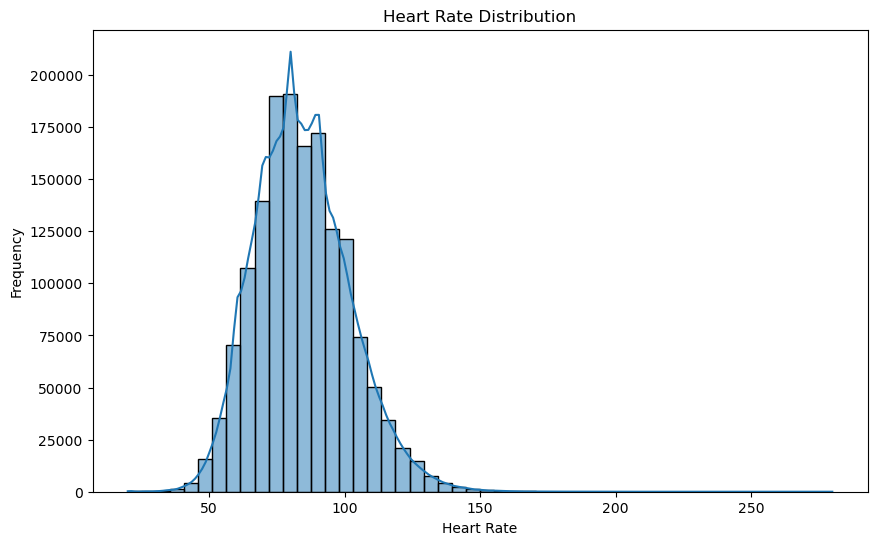

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['HR'], bins=50, kde=True)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()


C:\Users\v.sai krishna prasad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


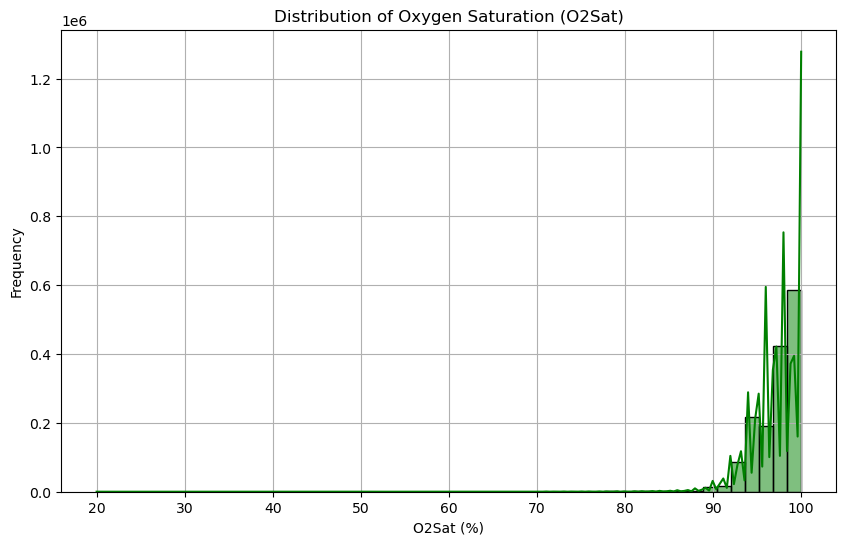

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['O2Sat'], bins=50, kde=True, color='green')
plt.title('Distribution of Oxygen Saturation (O2Sat)')
plt.xlabel('O2Sat (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


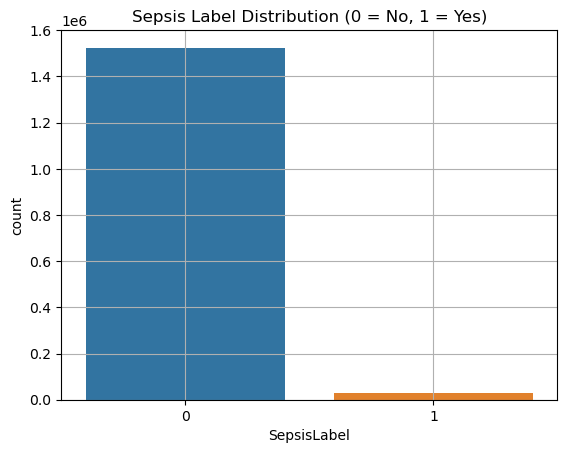

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='SepsisLabel', data=df)
plt.title('Sepsis Label Distribution (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()


In [10]:
print(df.columns.tolist())


['Hour', 'HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID']


In [11]:
# Drop 'Patient_ID' since it's just an identifier
df.drop('Patient_ID', axis=1, inplace=True)


In [12]:
# Split into features (X) and label (y)
X = df.drop('SepsisLabel', axis=1)
y = df['SepsisLabel']

# Check shapes
print("Feature shape:", X.shape)
print("Label shape:", y.shape)


Feature shape: (1552210, 13)
Label shape: (1552210,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("Training feature shape:", X_train.shape)
print("Test feature shape:", X_test.shape)
print("Training label shape:", y_train.shape)
print("Test label shape:", y_test.shape)


Training feature shape: (1396989, 13)
Test feature shape: (155221, 13)
Training label shape: (1396989,)
Test label shape: (155221,)


In [15]:
# Fill missing values with the mean of each column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [17]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train (fit) the model on the training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [18]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    152424
           1       0.11      0.00      0.00      2797

    accuracy                           0.98    155221
   macro avg       0.54      0.50      0.50    155221
weighted avg       0.97      0.98      0.97    155221



In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [20]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Sepsis', 'Sepsis']))


              precision    recall  f1-score   support

   No Sepsis       0.99      0.74      0.85    152424
      Sepsis       0.04      0.58      0.07      2797

    accuracy                           0.74    155221
   macro avg       0.51      0.66      0.46    155221
weighted avg       0.97      0.74      0.84    155221



In [21]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'sepsis_prediction_model.pkl')

print("Model saved as sepsis_prediction_model.pkl")


Model saved as sepsis_prediction_model.pkl
